### Explore

In [ ]:
import matplotlib.pyplot as plt

#### Laptop

##### Distribution of aspects

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as  pd
train = pd.read_json('/content/drive/MyDrive/ABSA/laptop/train.json').T.reset_index()
dev = pd.read_json('/content/drive/MyDrive/ABSA/laptop/dev.json').T.reset_index()
test = pd.read_json('/content/drive/MyDrive/ABSA/laptop/test.json').T.reset_index()

Mounted at /content/drive


In [ ]:
len(train)

2163

In [ ]:
t = train['sentence'].value_counts()
d = dev['sentence'].value_counts()
e = test['sentence'].value_counts()

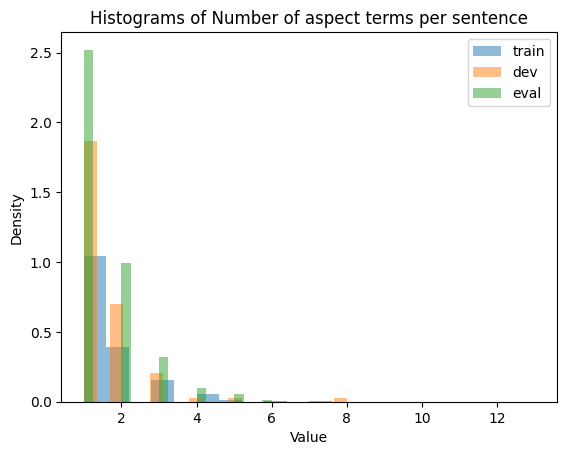

In [ ]:
plt.hist(t, bins = 20, density=True, alpha=0.5, label='train')
plt.hist(d, bins = 20, density=True, alpha=0.5, label='dev')
plt.hist(e, bins = 20, density=True, alpha=0.5, label='eval')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Histograms of Number of aspect terms per sentence')
plt.legend()
# Show the plot
plt.show()


<ipython-input-7-5ff4ef63835e>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(t, shade=True, label='Train')
<ipython-input-7-5ff4ef63835e>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d, shade=True, label='Val')
<ipython-input-7-5ff4ef63835e>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(e, shade=True, label='Test')


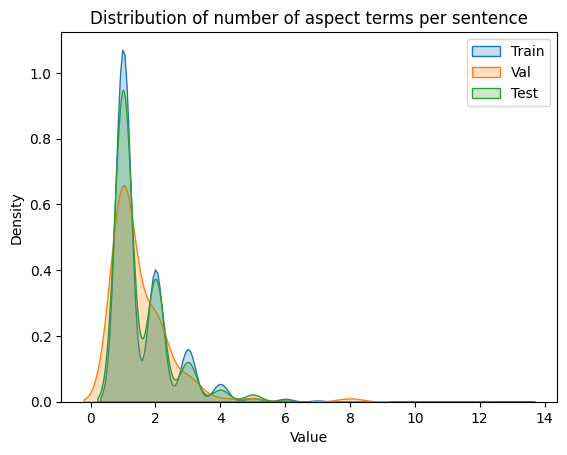

In [ ]:
import seaborn as sns
sns.kdeplot(t, shade=True, label='Train')
sns.kdeplot(d, shade=True, label='Val')
sns.kdeplot(e, shade=True, label='Test')
plt.title('Distribution of number of aspect terms per sentence')
plt.xlabel('Value')
plt.legend()

##### Sentence with multiple aspects with different polarities

In [ ]:
### Sentence with most aspects
tmp = train['sentence'].value_counts()[:1]
tmp

There are several programs for school or office use (Pages, Numbers, Keynote, etc.), music (Garageband), photo management (Photo Booth, iPhoto), video-editing or movie-making (iMovie), etc.    13
Name: sentence, dtype: int64

In [ ]:
# All aspects are neutral
train[train['sentence'] == tmp.index.values[0]]

,index,polarity,term,id,sentence
634,4530,neutral,Numbers,453_0,There are several programs for school or offic...
635,4531,neutral,school or office use,453_1,There are several programs for school or offic...
636,4532,neutral,music,453_2,There are several programs for school or offic...
637,4533,neutral,iPhoto,453_3,There are several programs for school or offic...
638,4534,neutral,programs,453_4,There are several programs for school or offic...
639,4535,neutral,Photo Booth,453_5,There are several programs for school or offic...
640,4536,neutral,photo management,453_6,There are several programs for school or offic...
641,4537,neutral,movie-making,453_7,There are several programs for school or offic...
642,4538,neutral,video-editing,453_8,There are several programs for school or offic...
643,4539,neutral,Pages,453_9,There are several programs for school or offic...


In [ ]:
### identify sentences with varied polarities
pct = pd.crosstab(train['sentence'], train['polarity'])
pct['sum'] = pct['negative'] + pct['positive'] + pct['neutral']
top10 = pct[pct['sum']>1].sort_values('sum', ascending = False)[['positive','neutral','negative']][:20]
top10

polarity,positive,neutral,negative
sentence,,,
"There are several programs for school or office use (Pages, Numbers, Keynote, etc.), music (Garageband), photo management (Photo Booth, iPhoto), video-editing or movie-making (iMovie), etc.",0,13,0
"I run Dreamweaver, Final Cut Pro 7, Photoshop, Safari, Firefox, MSN Messenger and a few other applications constantly at the same time.",0,7,0
"The computer runs very fast with no problems and the iLife software that comes with it (iPhoto, iMovie, iWeb, iTunes, GarageBand) is all very helpful as well.",7,0,0
"That included the extra Sony Sonic Stage software, the speakers and the subwoofer I got (that WAS worth the money), the bluetooth mouse for my supposedly bluetooth enabled computer, the extended life battery and the Docking port.",2,4,1
"I also purchased iWork to go with it which has programs for word processing, spreadsheets, and presentations (similar to Microsoft Office).",0,6,0
"the headphone and mic jack are in front of touch-pad making the touch-pad hard to use when using headphones/mic, not to mention the laptop was designed for right handed person.",0,1,5
"It has a 10 hour battery life when you're doing web browsing and word editing, making it perfect for the classroom or office, and in terms of gaming and movie playing it'll have a battery life of just over 5 hours.",2,4,0
"The dv4 boasted a faster processor, more memory, and a bigger hard drive than my old computer, plus a better quality web cam, nicer screen, and many other features.",6,0,0
"Even though it is running Snow Leopard, 2.4 GHz C2D is a bit of an antiquated CPU and thus the occasional spinning wheel would appear when running Office Mac applications such as Word or Excel.",1,0,5


In [ ]:
print('Only other thing is that if you are using this for document creation Apple doesnt provide any kind of word processor (such as works for windows), but iwork is cheap compared to office.')
train[train['sentence'] == 'Only other thing is that if you are using this for document creation Apple doesnt provide any kind of word processor (such as works for windows), but iwork is cheap compared to office.']

Only other thing is that if you are using this for document creation Apple doesnt provide any kind of word processor (such as works for windows), but iwork is cheap compared to office.


,index,polarity,term,id,sentence
113,17492,negative,office,1749_2,Only other thing is that if you are using this...
114,17493,neutral,windows,1749_3,Only other thing is that if you are using this...
115,17490,positive,iwork,1749_0,Only other thing is that if you are using this...
116,17491,negative,word processor,1749_1,Only other thing is that if you are using this...
117,17494,neutral,document creation,1749_4,Only other thing is that if you are using this...


##### Words used in different contexts

In [ ]:
train['term'].value_counts()

use                      49
price                    48
screen                   47
battery life             45
battery                  42
                         ..
DELL Customer Service     1
ground loop isolator      1
price range               1
LED backlit display       1
mute                      1
Name: term, Length: 983, dtype: int64

In [ ]:
pct = pd.crosstab(train['term'], train['polarity'])

In [ ]:
pct['sum'] = pct['negative'] + pct['positive'] + pct['neutral']

In [ ]:
pct

polarity,negative,neutral,positive,sum
term,,,,
"""sales"" team",1,0,0,1
1 GB ram,0,1,0,1
1-year-warranty,0,1,0,1
10-key,0,0,1,1
12 cell battery,0,0,1,1
...,...,...,...,...
word processor,2,0,0,2
work,8,0,1,9
working,1,0,0,1


In [ ]:
top10 = pct[pct['sum']>25].sort_values('sum', ascending = False)[['positive','neutral','negative']][:10]
top10

polarity,positive,neutral,negative
term,,,
use,45,1,3
price,40,2,6
screen,23,5,19
battery life,28,3,14
battery,9,4,29
keyboard,16,7,13
programs,19,7,8
software,9,7,15
features,21,6,3


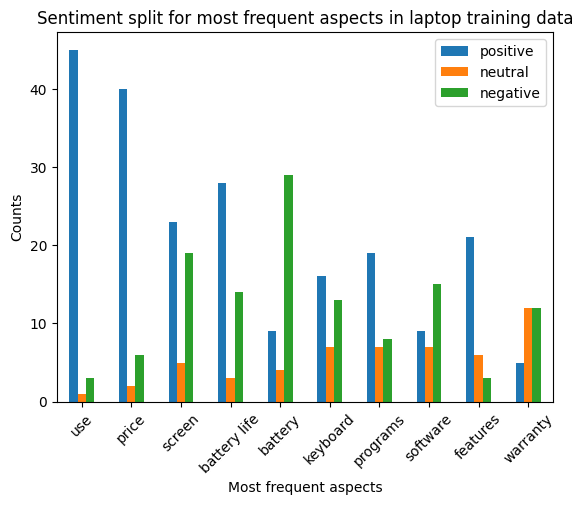

In [ ]:
df = pd.DataFrame(top10)

# Plot a bar plot with multiple adjacent bars for each index
df.plot.bar()
plt.title('Sentiment split for most frequent aspects in laptop training data')
plt.xlabel('Most frequent aspects')
plt.ylabel('Counts')
plt.legend()
plt.xticks(rotation = 45)
plt.show()

##### Problematic aspects

###### Aspects with punctuation

In [ ]:
train['term'][train['term'].str.contains(r'\b\w*[^\w\s]+\w*\b')]

10                                multi-touch mouse
36                                           10-key
71                                built-in wireless
91                                  built-in camera
109                                    S-video port
250                               one-year warranty
265                                   PC's keyboard
285                         bluray read/write drive
402                                 1-year-warranty
413                      Dell's customer disservice
429                            multi-touch gestures
461                        drivers/applications DVD
530                            multi-touch features
608                            Mac Snow Leopard O/S
641                                    movie-making
642                                   video-editing
653                                       touch-pad
688                               security-prone OS
703                                 built-in webcam
704         

###### Aspects Typos

In [ ]:
pip install pyspellchecker

In [ ]:
from spellchecker import SpellChecker
spell = SpellChecker()

In [ ]:
(train['term'] == 'consistancy').any()

In [ ]:
sorted(train['term'].apply(lambda x: [word for word in x.split() if word.lower() not in spell]),  key = len, reverse=True)[:50]

###### Reviews Typos

In [ ]:
sorted(train['sentence'].apply(lambda x: [word for word in x.split() if word.lower() not in spell]),  key = len, reverse=True)[:50]

##### Unusual lengths

###### Aspects

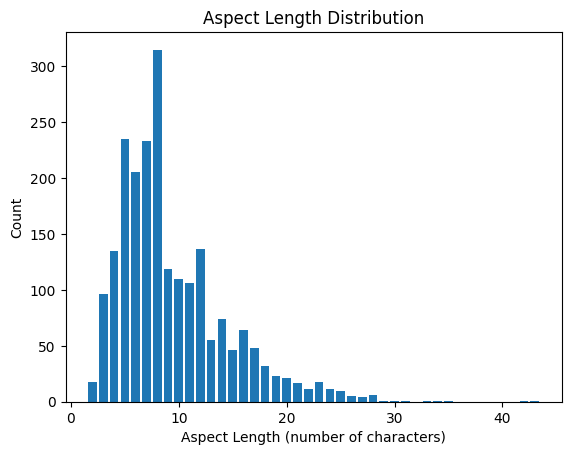

In [ ]:
text_lengths = train['term'].str.len()
distribution = text_lengths.value_counts().sort_index()

# Plot the distribution
plt.bar(distribution.index, distribution.values)
plt.xlabel('Aspect Length (number of characters)')
plt.ylabel('Count')
plt.title('Aspect Length Distribution')
plt.show()

In [ ]:
for i in train.sort_values(by='term', key=lambda x: x.str.len(), ascending=False)['term'][:10].values:
  print(i)

pre-loaded Norton Firewall/Security program
magnetic plug-in power charging power cord
virus protection programs for a Mac
hook up to other wireless networks
Core Processing Unit temperatures
Mac version of Microsoft Office
combined touch pad and clicker
pre installed software update
connection with the internet
Office Max's "Max Assurance"


In [ ]:
for i in train.sort_values(by='term', key=lambda x: x.str.len(), ascending=False)['term'][-30:].values:
  print(i)

LCD
use
use
run
use
use
USB
run
use
use
use
RAM
wt
OS
OS
OS
i7
OS
OS
HD
OS
OS
XP
HD
XP
i5
OS
OS
HD
HD


In [ ]:
min(train['term'], key=len)

In [ ]:
max(train['term'], key=len)

###### Reviews

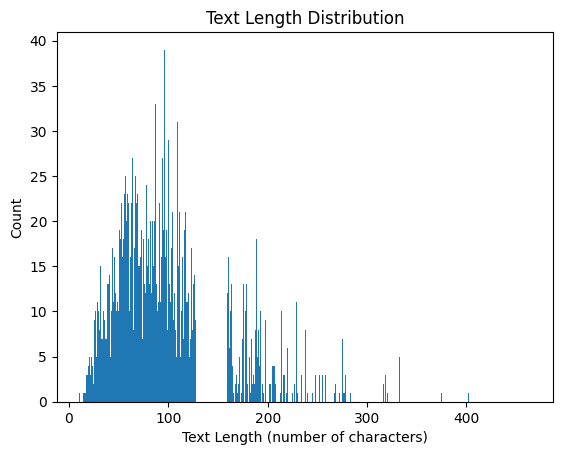

In [ ]:
text_lengths = train['sentence'].str.len()
distribution = text_lengths.value_counts().sort_index()

# Plot the distribution
plt.bar(distribution.index, distribution.values)
plt.xlabel('Text Length (number of characters)')
plt.ylabel('Count')
plt.title('Text Length Distribution')
plt.show()

In [ ]:
train.sort_values(by='sentence', key=lambda x: x.str.len(), ascending=False)['sentence'][:10]

1633    In November my computer messed up entirely and...
1634    In November my computer messed up entirely and...
990     In November my computer messed up entirely and...
1822      Toshiba customer services will indirectly de...
584       Long story short, since I experience so many...
596       We have had numerous problems with Vista, su...
593       We have had numerous problems with Vista, su...
592       We have had numerous problems with Vista, su...
595       We have had numerous problems with Vista, su...
594       We have had numerous problems with Vista, su...
Name: sentence, dtype: object

In [ ]:
train.sort_values(by='term', key=lambda x: x.str.len())['sentence'][:10]

1633    In November my computer messed up entirely and...
1361    I love its solid build, light wt and excellent...
1699    It seems they could have updated XP and done w...
500        Bigger HD, better graphics card, and a bid HD.
502        Bigger HD, better graphics card, and a bid HD.
211     You will need them if you want to reload the O...
1691    Also, if you need to talk to a representive at...
807     Being a PC user my whole life, it's taking a b...
877     Everything from the design to the OS is simple...
528     The OS is also very user friendly, even for th...
Name: sentence, dtype: object

In [ ]:
train.iloc[15].values

array([15531, 'positive', 'battery', '1553_1',
       'Great battery, speed, display.'], dtype=object)

In [ ]:
min(train['sentence'], key=len)

'Good price.'

In [ ]:
train[train['sentence'] == 'Good price.']

,index,polarity,term,id,sentence
1227,26840,positive,price,2684_0,Good price.


In [ ]:
max(train['sentence'], key=len)

### Sentiment analysis (Laptop)

In [ ]:
import gensim.downloader as api
model = api.load("word2vec-google-news-300")  # download the model and return as object ready for use
model.most_similar("cat")

[--------------------------------------------------] 0.1% 1.7/1662.8MB downloaded

KeyboardInterrupt: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as  pd
train = pd.read_json('/content/drive/MyDrive/ABSA/laptop/train.json').T.reset_index()
dev = pd.read_json('/content/drive/MyDrive/ABSA/laptop/dev.json').T.reset_index()
test = pd.read_json('/content/drive/MyDrive/ABSA/laptop/test.json').T.reset_index()

Mounted at /content/drive


#### preprocess

In [ ]:

def preprocess_text(text):

    # Remove special characters and numbers
    text = re.sub('[^a-zA-Z]', ' ', text)

    text = text.lower()

    # Tokenize
    words = text.split()

    # Remove stopwords
    #stop_words = set(stopwords.words('english'))
    #words = [word for word in words if word not in stop_words]

    #lemmatizer = WordNetLemmatizer()
    #words = [lemmatizer.lemmatize(word) for word in words]

    return words

In [ ]:
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import torch


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
train['processed_tokens'] = train['sentence'].apply(preprocess_text)
dev['processed_tokens'] = dev['sentence'].apply(preprocess_text)
test['processed_tokens'] = test['sentence'].apply(preprocess_text)

In [ ]:
train['processed_aspects'] = train['term'].apply(preprocess_text)
dev['processed_aspects'] = dev['term'].apply(preprocess_text)
test['processed_aspects'] = test['term'].apply(preprocess_text)

In [ ]:
print(train.shape)
print(dev.shape)
print(test.shape)

(2163, 7)
(150, 7)
(638, 7)


In [ ]:
train = train.drop([i for i,w in train['processed_aspects'].items() if len(w) == 0])

#### embeddings

In [ ]:
sent_emb = []
for sent in train['processed_tokens']:
  sent_emb.append(model.get_mean_vector(sent))
sent_emb  = torch.Tensor(sent_emb)

<ipython-input-21-bdb3d4fcb10c>:4: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  sent_emb  = torch.Tensor(sent_emb)


In [ ]:
asp_emb = []
for aw in train['processed_aspects']:
  asp_emb.append(model.get_mean_vector(aw))
asp_emb  = torch.Tensor(asp_emb)

In [ ]:
print(sent_emb.shape, asp_emb.shape)

torch.Size([2161, 300]) torch.Size([2161, 300])


In [ ]:
emb = torch.cat( [sent_emb, asp_emb], axis = 1 )

In [ ]:
train['polarity'].value_counts()

positive    930
negative    800
neutral     431
Name: polarity, dtype: int64

#### dev and test emb

In [ ]:
dev_sent_emb = []
for sent in dev['processed_tokens']:
  dev_sent_emb.append(model.get_mean_vector(sent))
dev_sent_emb  = torch.Tensor(dev_sent_emb)

dev_asp_emb = []
for aw in dev['processed_aspects']:
  dev_asp_emb.append(model.get_mean_vector(aw))
dev_asp_emb  = torch.Tensor(dev_asp_emb)

In [ ]:
dev_emb = torch.cat( [dev_sent_emb, dev_asp_emb], axis = 1 )

In [ ]:
dev_emb.shape

torch.Size([150, 600])

In [ ]:
test_sent_emb = []
for sent in test['processed_tokens']:
  test_sent_emb.append(model.get_mean_vector(sent))
test_sent_emb  = torch.Tensor(test_sent_emb)

test_asp_emb = []
for aw in test['processed_aspects']:
  test_asp_emb.append(model.get_mean_vector(aw))
test_asp_emb  = torch.Tensor(test_asp_emb)

In [ ]:
test_emb = torch.cat( [test_sent_emb, test_asp_emb], axis = 1 )

In [ ]:
test_emb.shape

torch.Size([638, 600])

#### dataloader

In [ ]:
batch_size = 32

In [ ]:
from torch.utils.data import DataLoader, TensorDataset

# Assuming you have defined your dataset and label
labels = list(train['polarity'])

# Convert labels to numerical values
label_mapping = {'positive': 0, 'negative': 1, 'neutral': 2}
numeric_labels = [label_mapping[label] for label in labels]

# Convert dataset and labels to PyTorch tensors
dataset_tensor = emb
labels_tensor = torch.LongTensor(numeric_labels)

# Create a TensorDataset from dataset and labels
data = TensorDataset(dataset_tensor, labels_tensor)

# Create a DataLoader
dataloader = DataLoader(data, batch_size=batch_size, shuffle=True)

In [ ]:
## DEV
dev_labels = list(dev['polarity'])
label_mapping = {'positive': 0, 'negative': 1, 'neutral': 2}
dev_numeric_labels = [label_mapping[label] for label in dev_labels]
dev_dataset_tensor = dev_emb
dev_labels_tensor = torch.LongTensor(dev_numeric_labels)
dev_data = TensorDataset(dev_dataset_tensor, dev_labels_tensor)
dev_dataloader = DataLoader(dev_data, batch_size=batch_size, shuffle=True)

In [ ]:
## test
test_labels = list(test['polarity'])
label_mapping = {'positive': 0, 'negative': 1, 'neutral': 2}
test_numeric_labels = [label_mapping[label] for label in test_labels]
test_dataset_tensor = test_emb
test_labels_tensor = torch.LongTensor(test_numeric_labels)
test_data = TensorDataset(test_dataset_tensor, test_labels_tensor)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=True)

#### model

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

# Define your fully feed-forward network with multiple hidden layers
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(600, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 3)  # Assuming 3 classes: pos, neg, neutral

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x


# Define batch size and number of epochs
num_epochs = 10


# Initialize your network
model = Net()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Training loop
for epoch in range(num_epochs):
    total_loss = 0
    total_correct = 0
    total_samples = 0

    for batch_inputs, batch_labels in dataloader:
        # Forward pass
        outputs = model(batch_inputs)

        # Compute loss
        loss = criterion(outputs, batch_labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Update accuracy metrics
        total_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_correct += (predicted == batch_labels).sum().item()
        total_samples += batch_labels.size(0)

    # Calculate accuracy
    accuracy = total_correct / total_samples

    # Print epoch statistics
    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {total_loss:.4f}, Accuracy: {accuracy:.4f}")

    # Validation phase
    model.eval()
    val_loss = 0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for val_inputs, val_labels in dev_dataloader:
            # Forward pass
            val_outputs = model(val_inputs)

            # Compute validation loss
            loss = criterion(val_outputs, val_labels)

            # Update validation accuracy metrics
            val_loss += loss.item()
            _, val_predicted = torch.max(val_outputs.data, 1)
            val_correct += (val_predicted == val_labels).sum().item()
            val_total += val_labels.size(0)

    # Calculate validation accuracy
    val_accuracy = val_correct / val_total

    # Print epoch statistics
    print(f"Epoch {epoch + 1}/{num_epochs}, "
          f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")




Epoch 1/10, Loss: 62.4444, Accuracy: 0.5650
Epoch 1/10, Val Loss: 4.2876, Val Accuracy: 0.6200
Epoch 2/10, Loss: 51.6539, Accuracy: 0.6613
Epoch 2/10, Val Loss: 4.3158, Val Accuracy: 0.5933
Epoch 3/10, Loss: 46.2169, Accuracy: 0.7062
Epoch 3/10, Val Loss: 4.1088, Val Accuracy: 0.6400
Epoch 4/10, Loss: 42.7699, Accuracy: 0.7344
Epoch 4/10, Val Loss: 4.2082, Val Accuracy: 0.6467
Epoch 5/10, Loss: 37.7037, Accuracy: 0.7696
Epoch 5/10, Val Loss: 3.7981, Val Accuracy: 0.6933
Epoch 6/10, Loss: 35.8343, Accuracy: 0.7867
Epoch 6/10, Val Loss: 4.4357, Val Accuracy: 0.6333
Epoch 7/10, Loss: 34.5559, Accuracy: 0.7890
Epoch 7/10, Val Loss: 5.1996, Val Accuracy: 0.6067
Epoch 8/10, Loss: 31.3670, Accuracy: 0.8103
Epoch 8/10, Val Loss: 5.2819, Val Accuracy: 0.6467
Epoch 9/10, Loss: 28.5330, Accuracy: 0.8191
Epoch 9/10, Val Loss: 5.1914, Val Accuracy: 0.6133
Epoch 10/10, Loss: 28.3439, Accuracy: 0.8311
Epoch 10/10, Val Loss: 5.1759, Val Accuracy: 0.6267


#### test

In [ ]:
# Validation phase
model.eval()
val_loss = 0
val_correct = 0
val_total = 0


pred_list = []
label_list =  []

with torch.no_grad():
    for val_inputs, val_labels in test_dataloader:
        # Forward pass
        val_outputs = model(val_inputs)

        # Compute validation loss
        loss = criterion(val_outputs, val_labels)

        # Update validation accuracy metrics
        val_loss += loss.item()
        _, val_predicted = torch.max(val_outputs.data, 1)

        pred_list.extend(val_predicted.tolist())
        label_list.extend(val_labels.tolist())

        val_correct += (val_predicted == val_labels).sum().item()
        val_total += val_labels.size(0)

# Calculate validation accuracy
val_accuracy = val_correct / val_total

# Print epoch statistics
print(f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")

Val Loss: 18.3065, Val Accuracy: 0.6755


In [ ]:
'positive': 0, 'negative': 1, 'neutral': 2

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(label_list, pred_list, labels = [0,1,2], target_names = ['positive','negative','neutral'])
print(report)

              precision    recall  f1-score   support

    positive       0.80      0.80      0.80       341
    negative       0.45      0.62      0.52       128
     neutral       0.64      0.46      0.54       169

    accuracy                           0.68       638
   macro avg       0.63      0.63      0.62       638
weighted avg       0.69      0.68      0.68       638



### Restaurant

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as  pd
train = pd.read_json('/content/drive/MyDrive/ABSA/rest/train.json').T.reset_index()
dev = pd.read_json('/content/drive/MyDrive/ABSA/rest/dev.json').T.reset_index()
test = pd.read_json('/content/drive/MyDrive/ABSA/rest/test.json').T.reset_index()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import gensim.downloader as api
model = api.load("word2vec-google-news-300")  # download the model and return as object ready for use
model.most_similar("cat")

[('cats', 0.8099379539489746),
 ('dog', 0.760945737361908),
 ('kitten', 0.7464985251426697),
 ('feline', 0.7326234579086304),
 ('beagle', 0.7150582671165466),
 ('puppy', 0.7075453400611877),
 ('pup', 0.6934291124343872),
 ('pet', 0.6891531348228455),
 ('felines', 0.6755931973457336),
 ('chihuahua', 0.6709762215614319)]

In [ ]:
def preprocess_text(text):

    # Remove special characters and numbers
    text = re.sub('[^a-zA-Z]', ' ', text)

    text = text.lower()

    # Tokenize
    words = text.split()

    # Remove stopwords
    #stop_words = set(stopwords.words('english'))
    #words = [word for word in words if word not in stop_words]

    #lemmatizer = WordNetLemmatizer()
    #words = [lemmatizer.lemmatize(word) for word in words]

    return words

train['processed_tokens'] = train['sentence'].apply(preprocess_text)
dev['processed_tokens'] = dev['sentence'].apply(preprocess_text)
test['processed_tokens'] = test['sentence'].apply(preprocess_text)

train['processed_aspects'] = train['term'].apply(preprocess_text)
dev['processed_aspects'] = dev['term'].apply(preprocess_text)
test['processed_aspects'] = test['term'].apply(preprocess_text)

print(train.shape)
print(dev.shape)
print(test.shape)

train = train.drop([i for i,w in train['processed_aspects'].items() if len(w) == 0])

(3452, 7)
(150, 7)
(1120, 7)


In [ ]:
sent_emb = []
for sent in train['processed_tokens']:
  sent_emb.append(model.get_mean_vector(sent))
sent_emb  = torch.Tensor(sent_emb)

asp_emb = []
for aw in train['processed_aspects']:
  asp_emb.append(model.get_mean_vector(aw))
asp_emb  = torch.Tensor(asp_emb)

print(sent_emb.shape, asp_emb.shape)

emb = torch.cat( [sent_emb, asp_emb], axis = 1 )

print(emb.shape)

torch.Size([3452, 300]) torch.Size([3452, 300])
torch.Size([3452, 600])


In [ ]:
dev_sent_emb = []
for sent in dev['processed_tokens']:
  dev_sent_emb.append(model.get_mean_vector(sent))
dev_sent_emb  = torch.Tensor(dev_sent_emb)

dev_asp_emb = []
for aw in dev['processed_aspects']:
  dev_asp_emb.append(model.get_mean_vector(aw))
dev_asp_emb  = torch.Tensor(dev_asp_emb)

dev_emb = torch.cat( [dev_sent_emb, dev_asp_emb], axis = 1 )

dev_emb.shape

torch.Size([150, 600])

In [ ]:
test_sent_emb = []
for sent in test['processed_tokens']:
  test_sent_emb.append(model.get_mean_vector(sent))
test_sent_emb  = torch.Tensor(test_sent_emb)

test_asp_emb = []
for aw in test['processed_aspects']:
  test_asp_emb.append(model.get_mean_vector(aw))
test_asp_emb  = torch.Tensor(test_asp_emb)

test_emb = torch.cat( [test_sent_emb, test_asp_emb], axis = 1 )

test_emb.shape

torch.Size([1120, 600])

In [ ]:
train['polarity'].value_counts()

positive    2094
negative     779
neutral      579
Name: polarity, dtype: int64

In [ ]:
batch_size = 32

from torch.utils.data import DataLoader, TensorDataset

# Assuming you have defined your dataset and label
labels = list(train['polarity'])

# Convert labels to numerical values
label_mapping = {'positive': 0, 'negative': 1, 'neutral': 2}
numeric_labels = [label_mapping[label] for label in labels]

# Convert dataset and labels to PyTorch tensors
dataset_tensor = emb
labels_tensor = torch.LongTensor(numeric_labels)

# Create a TensorDataset from dataset and labels
data = TensorDataset(dataset_tensor, labels_tensor)

# Create a DataLoader
dataloader = DataLoader(data, batch_size=batch_size, shuffle=True)

In [ ]:
## DEV
dev_labels = list(dev['polarity'])
label_mapping = {'positive': 0, 'negative': 1, 'neutral': 2}
dev_numeric_labels = [label_mapping[label] for label in dev_labels]
dev_dataset_tensor = dev_emb
dev_labels_tensor = torch.LongTensor(dev_numeric_labels)
dev_data = TensorDataset(dev_dataset_tensor, dev_labels_tensor)
dev_dataloader = DataLoader(dev_data, batch_size=batch_size, shuffle=True)

In [ ]:
## test
test_labels = list(test['polarity'])
label_mapping = {'positive': 0, 'negative': 1, 'neutral': 2}
test_numeric_labels = [label_mapping[label] for label in test_labels]
test_dataset_tensor = test_emb
test_labels_tensor = torch.LongTensor(test_numeric_labels)
test_data = TensorDataset(test_dataset_tensor, test_labels_tensor)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=True)

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

# Define your fully feed-forward network with multiple hidden layers
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(600, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 3)  # Assuming 3 classes: pos, neg, neutral

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x


# Define batch size and number of epochs
num_epochs = 10


# Initialize your network
model = Net()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Training loop
for epoch in range(num_epochs):
    total_loss = 0
    total_correct = 0
    total_samples = 0

    for batch_inputs, batch_labels in dataloader:
        # Forward pass
        outputs = model(batch_inputs)

        # Compute loss
        loss = criterion(outputs, batch_labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Update accuracy metrics
        total_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_correct += (predicted == batch_labels).sum().item()
        total_samples += batch_labels.size(0)

    # Calculate accuracy
    accuracy = total_correct / total_samples

    # Print epoch statistics
    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {total_loss:.4f}, Accuracy: {accuracy:.4f}")

    # Validation phase
    model.eval()
    val_loss = 0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for val_inputs, val_labels in dev_dataloader:
            # Forward pass
            val_outputs = model(val_inputs)

            # Compute validation loss
            loss = criterion(val_outputs, val_labels)

            # Update validation accuracy metrics
            val_loss += loss.item()
            _, val_predicted = torch.max(val_outputs.data, 1)
            val_correct += (val_predicted == val_labels).sum().item()
            val_total += val_labels.size(0)

    # Calculate validation accuracy
    val_accuracy = val_correct / val_total

    # Print epoch statistics
    print(f"Epoch {epoch + 1}/{num_epochs}, "
          f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")




Epoch 1/10, Loss: 91.7444, Accuracy: 0.6231
Epoch 1/10, Val Loss: 4.9230, Val Accuracy: 0.5133
Epoch 2/10, Loss: 76.3894, Accuracy: 0.6932
Epoch 2/10, Val Loss: 4.4309, Val Accuracy: 0.6067
Epoch 3/10, Loss: 71.3529, Accuracy: 0.7164
Epoch 3/10, Val Loss: 4.4644, Val Accuracy: 0.5933
Epoch 4/10, Loss: 66.2785, Accuracy: 0.7439
Epoch 4/10, Val Loss: 3.9810, Val Accuracy: 0.6000
Epoch 5/10, Loss: 63.4117, Accuracy: 0.7503
Epoch 5/10, Val Loss: 4.3648, Val Accuracy: 0.5733
Epoch 6/10, Loss: 60.8188, Accuracy: 0.7598
Epoch 6/10, Val Loss: 4.4210, Val Accuracy: 0.6067
Epoch 7/10, Loss: 56.1862, Accuracy: 0.7723
Epoch 7/10, Val Loss: 4.5648, Val Accuracy: 0.5733
Epoch 8/10, Loss: 52.8896, Accuracy: 0.7946
Epoch 8/10, Val Loss: 5.1858, Val Accuracy: 0.5600
Epoch 9/10, Loss: 50.7460, Accuracy: 0.8036
Epoch 9/10, Val Loss: 5.1987, Val Accuracy: 0.5267
Epoch 10/10, Loss: 45.9003, Accuracy: 0.8123
Epoch 10/10, Val Loss: 5.4339, Val Accuracy: 0.5400


In [ ]:
# Validation phase
model.eval()
val_loss = 0
val_correct = 0
val_total = 0


pred_list = []
label_list =  []

with torch.no_grad():
    for val_inputs, val_labels in test_dataloader:
        # Forward pass
        val_outputs = model(val_inputs)

        # Compute validation loss
        loss = criterion(val_outputs, val_labels)

        # Update validation accuracy metrics
        val_loss += loss.item()
        _, val_predicted = torch.max(val_outputs.data, 1)

        pred_list.extend(val_predicted.tolist())
        label_list.extend(val_labels.tolist())

        val_correct += (val_predicted == val_labels).sum().item()
        val_total += val_labels.size(0)

# Calculate validation accuracy
val_accuracy = val_correct / val_total

# Print epoch statistics
print(f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")

Val Loss: 25.5432, Val Accuracy: 0.7500


In [ ]:
from sklearn.metrics import classification_report
report = classification_report(label_list, pred_list, labels = [0,1,2], target_names = ['positive','negative','neutral'])
print(report)

              precision    recall  f1-score   support

    positive       0.82      0.89      0.85       728
    negative       0.57      0.69      0.63       196
     neutral       0.63      0.27      0.38       196

    accuracy                           0.75      1120
   macro avg       0.67      0.62      0.62      1120
weighted avg       0.74      0.75      0.73      1120



### Identify NER terms

In [ ]:
model.most_similar("laptop")

[('laptops', 0.8053741455078125),
 ('laptop_computer', 0.7848465442657471),
 ('notebook', 0.67857825756073),
 ('netbook', 0.6707928776741028),
 ('computer', 0.6640493273735046),
 ('laptop_computers', 0.6633791327476501),
 ('notebook_PC', 0.6631842851638794),
 ('MacBook', 0.6598750352859497),
 ('PowerBook', 0.6520565748214722),
 ('Sony_Vaio_laptop', 0.6496157050132751)]

In [ ]:
model.most_similar("review")

[('reviewed', 0.6630409359931946),
 ('reviewing', 0.6609557271003723),
 ('reviews', 0.6379557251930237),
 ('evaluation', 0.6035540699958801),
 ('assessment', 0.533311128616333),
 ('examine', 0.529162585735321),
 ('scrutinize', 0.5097422003746033),
 ('Review', 0.5088513493537903),
 ('reveiw', 0.5067904591560364),
 ('4BETTER_OR_WORSE', 0.5062153339385986)]

In [ ]:
model.similarity('review','feedback')

0.30173475

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as  pd
train = pd.read_json('/content/drive/MyDrive/ABSA/laptop/train.json').T.reset_index()

In [ ]:
train.head()

,index,polarity,term,id,sentence
0,3270,positive,use,327_0,Also it is very good for college students who ...
1,30770,positive,noise,3077_0,For those that care about noise this thing doe...
2,15921,positive,force,1592_1,Enjoy that Toshib force and durability unparal...
3,3290,negative,expense,329_0,I know that everyone thinks Macs are overprice...
4,11840,negative,word processor,1184_0,) And printing from either word processor is a...


In [ ]:

def preprocess_text(text):

    # Remove special characters and numbers
    text = re.sub('[^a-zA-Z]', ' ', text)

    text = text.lower()

    # Tokenize
    words = text.split()

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Apply lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    return words

In [ ]:
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
train['processed_tokens'] = train['sentence'].apply(preprocess_text)

In [ ]:
train['processed_aspects'] = train['term'].apply(preprocess_text)

In [ ]:
aspect_words = set()

for w in train['processed_aspects']:
  for sw in w:
    if  sw.lower() in model.key_to_index.keys():
      aspect_words.add(sw.lower())

In [ ]:
len(aspect_words)

636

In [ ]:
len(train)

2163

In [ ]:
s = [model.similarity('laptop',w) for w in aspect_words]

In [ ]:
min(s)

-0.25905126

In [ ]:
max(s)

0.7993143

In [ ]:
sum(s)/len(s)

0.3225325124240158

In [ ]:
s = [ max(model.similarity('review',w),model.similarity('laptop',w)) for w in aspect_words]

In [ ]:
import matplotlib.pyplot as plt

(array([  3.,  13.,  26.,  51.,  78., 131., 174., 112.,  39.,   9.]),
 array([-0.14057602, -0.04658699,  0.04740205,  0.14139108,  0.23538011,
         0.32936916,  0.42335817,  0.51734722,  0.61133623,  0.70532531,
         0.79931432]),
 <BarContainer object of 10 artists>)

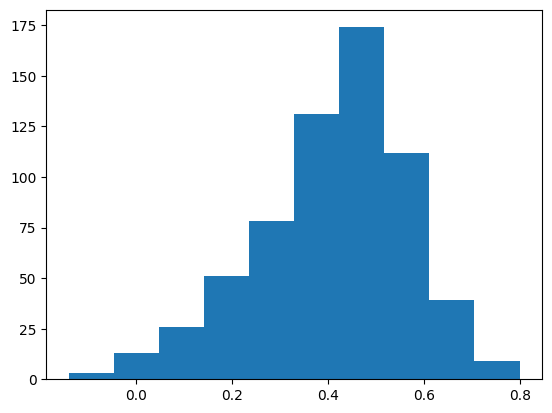

In [ ]:
plt.hist(s)

In [ ]:
train.head()

,index,polarity,term,id,sentence,processed_tokens,processed_aspects
0,3270,positive,use,327_0,Also it is very good for college students who ...,"[also, good, college, student, need, reliable,...",[use]
1,30770,positive,noise,3077_0,For those that care about noise this thing doe...,"[care, noise, thing, really, make]",[noise]
2,15921,positive,force,1592_1,Enjoy that Toshib force and durability unparal...,"[enjoy, toshib, force, durability, unparalleled]",[force]
3,3290,negative,expense,329_0,I know that everyone thinks Macs are overprice...,"[know, everyone, think, mac, overpriced, overr...",[expense]
4,11840,negative,word processor,1184_0,) And printing from either word processor is a...,"[printing, either, word, processor, adventure]","[word, processor]"


In [ ]:
other_words = set()
for sentence in train['processed_tokens']:
  for w in sentence:
    for sw in w.split():
      if  sw.lower() in model.key_to_index.keys():
        if sw.lower() not in aspect_words:
          other_words.add(sw.lower())

In [ ]:
s = [ model.similarity('laptop',w) for w in other_words]

(array([ 44., 137., 285., 525., 587., 195.,  22.,   6.,   2.,   1.]),
 array([-0.22518566, -0.10266709,  0.01985147,  0.14237003,  0.26488861,
         0.38740718,  0.50992572,  0.63244432,  0.75496286,  0.87748146,
         1.        ]),
 <BarContainer object of 10 artists>)

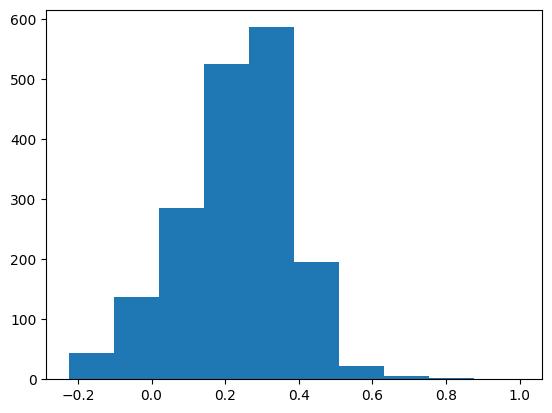

In [ ]:
plt.hist(s)